### Nama    : Raudhya Azzahra' ###
### NIM     : 2209106034 ###
### Kelas   : IF A2 2022 ###

### POSTTEST 5 KB ###

====================================================================================================


Import Pacakage

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans


Deklarasi file CSV

In [2]:
dhya = pd.read_csv('travel_insurance.csv')
dhya

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


Tipe data dataset

In [3]:
dhya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


Melakukan data cleaning pada data dengan nilai duplikat

In [4]:
dhya.drop_duplicates(inplace=True)

### A. SUPERVISED LEARNING ###

#### A1. Mengimplementasikan metode ####

a. Support Vector Clustering menggunakan SVM

In [81]:
X2 = dhya[['Net Sales', 'Commision (in value)']]
y2 = dhya['Agency']

# Mengubah nilai yang bukan CBH menjadi non-CBH
y2 = np.where(y2 == 'CBH', 'CBH', 'Non-CBH')

In [84]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=30
)

In [85]:
svm = SVC(kernel="linear")
svm.fit(X_train2, y_train2)

SVC(kernel='linear')

In [89]:
y_pred2 = svm.predict(X_test2) #prediksi dengan X_test dari dhya

sv = svm.support_vectors_ # ambil nilai support vector dari objek
sv

array([[ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 0.0000e+00,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,  9.5700e+00],
       [ 2.9000e+01,

b. Regression Linear

In [55]:
X = dhya[['Net Sales']]
y = dhya['Commision (in value)']

Mengatur perbandingan training set dan test set menjadi 80:20

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

melatih model regresi linear

In [57]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Melakukan prediksi

In [58]:
y_pred = reg.predict(X_test)

In [59]:
y_score = reg.score(X_test, y_test)
y_score

0.4465094624032867

#### A2. Hasil Prediksi ####

a. Klasifikasi

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr

In [20]:
# Hitung confusion matrix
cm = confusion_matrix(y_test2 ,y_pred2)
cm

array([[    0,    15],
       [    0, 11042]], dtype=int64)

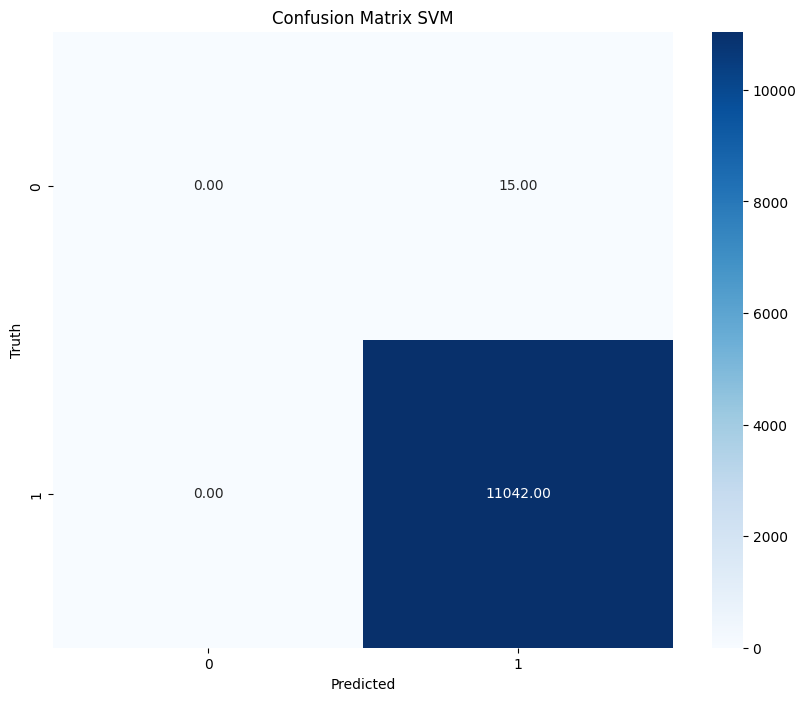

In [21]:

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix SVM')
plt.show()

In [22]:
result = cr(y_test2, y_pred2)
print(result)

              precision    recall  f1-score   support

         CBH       0.00      0.00      0.00        15
     Non-CBH       1.00      1.00      1.00     11042

    accuracy                           1.00     11057
   macro avg       0.50      0.50      0.50     11057
weighted avg       1.00      1.00      1.00     11057



c:\Users\Raudhya Azzahra'\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Raudhya Azzahra'\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Raudhya Azzahra'\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Hasil prediksi ini menunjukkan bahwa model klasifikasi memiliki tingkat akurasi yang tinggi (1.00 atau 100%), tetapi kinerjanya sangat buruk dalam mengklasifikasikan kelas minoritas 'CBH', dengan presisi, recall, dan skor F1 sebesar 0.00. Model ini cenderung hanya memprediksi mayoritas kelas 'Non-CBH' dan menghasilkan akurasi yang tinggi.

b. Regresi

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from numpy import sqrt

In [62]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

# print (mae, mse, rmse, r2, sep='\n')
print(f" MAE {mae}\n MSE {mse}\n RMSE {rmse}\n R2 {r2}")

 MAE 9.313071404071467
 MSE 247.14168806790056
 RMSE 15.720740697177744
 R2 0.4465094624032867



Hasil prediksi menggambarkan bahwa model regresi memiliki tingkat kesalahan yang cukup besar dalam memprediksi nilai target. MAE sekitar 9.31, yang menggambarkan rata-rata kesalahan absolut. RMSE sekitar 15.72, mengindikasikan kesalahan dalam unit yang sama dengan variabel target. Nilai R^2 sekitar 0.45, menunjukkan bahwa model hanya mampu menjelaskan sekitar 45% variabilitas dalam data target

#### A3. Plot Hasil Prediksi ####

a. Menggunakan SVM

c:\Users\Raudhya Azzahra'\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Age')

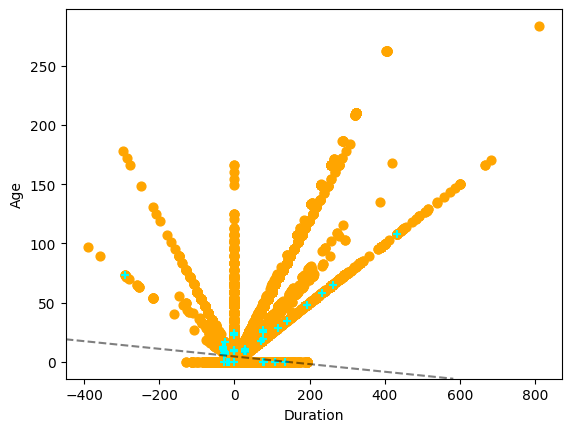

In [25]:
# plot data points dari CBH
plt.scatter(X2[y2 == 'CBH'].iloc[:,0], 
            X2[y2 == 'CBH'].iloc[:,1], 
            s=40, c='green', marker='o', label='CBH')

#Plot data points dari non-CBH
plt.scatter(X2[y2 == 'Non-CBH'].iloc[:,0],
            X2[y2 == 'Non-CBH'].iloc[:,1],
            s=40, c='orange', marker='o', label='Non-CBH')

# Tampilkan Titik-Titik Support Vectors-nya
plt.scatter(sv[:, 0], sv[:, 1], s=40,
color='cyan', marker='+', label='Support Vectors')

# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x
# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,

linestyles=['--', '-', '--'])

#Plot data points dari support vector
# plt.scatter()

plt.xlabel("Duration")
plt.ylabel("Age")


B. Menggunakan regresi linear

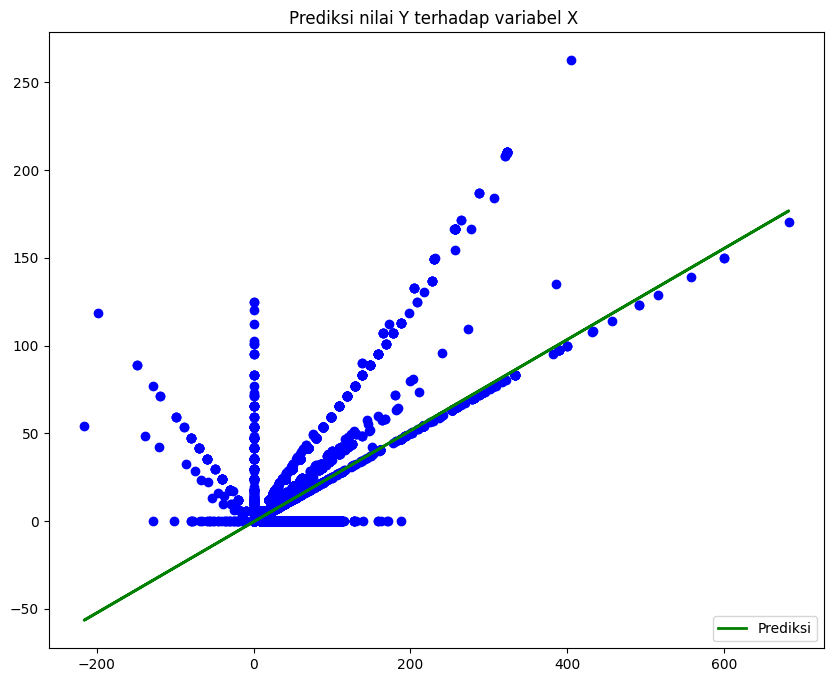

In [37]:
plt.figure(figsize=(10,8))
plt.scatter (X_test2, y_test2, c="blue") # c = color
plt.plot(X_test2, y_pred2, c="green", linewidth=2, label='Prediksi')
plt.legend(loc='lower right') #loc = lokasi (upper/lower)
plt.title('Prediksi nilai Y terhadap variabel X ')
plt.show()

### B. UNSUPERVISED LEARNING ###

#### B1. Mengimplementasikan metode K-MEANS ####

In [45]:
X = dhya[['Net Sales', 'Commision (in value)']]
K = 2

kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(X)

cluster_labels = kmeans.labels_
dhya["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_
cluster_mapping = {0: 1, 1: 0}
dhya['cluster'] = dhya['cluster'].map(cluster_mapping)

#### B2. Cluster yg telah diprediksi ####

a. Tanpa label asli

In [68]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [70]:
# Menghitung metrik-metrik klastering
def calculate_clustering_metrics(X, labels):
    ss_score = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    ch_index = calinski_harabasz_score(X, labels)
    return ss_score, db_index, ch_index

# label klastering
labels = dhya['cluster']

# Hitung metrik-metrik klastering
ss, db, ch = calculate_clustering_metrics(X, labels)

# Print hasil metrik klastering
print(f"Silhouette Score: {ss:.2f}")
print(f"Davies-Bouldin Index: {db:.2f}")
print(f"Calinski-Harabasz Index: {ch:.2f}")


Silhouette Score: 0.81
Davies-Bouldin Index: 0.46
Calinski-Harabasz Index: 75558.57


Hasil clustering diatas menunjukkan bahwa kluster-kelompok yang dihasilkan cukup baik dalam memisahkan data dan menjelaskan variabilitas dalam data. Nilai Silhouette Score yang tinggi menunjukkan bahwa titik-titik dalam kluster terpisah dengan baik satu sama lain, Davies-Bouldin Index yang rendah mengindikasikan kluster yang cukup terpisah dan kompak, serta Calinski-Harabasz Index yang tinggi menunjukkan bahwa kluster mungkin menjelaskan variabilitas dalam data dengan baik.

b. Dengan label asli

Mengubah label kategorikal menjadi numerik

In [71]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah label kategorikal menjadi numerik
dhya['Claim'] = label_encoder.fit_transform(dhya['Claim'])

In [72]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score

In [76]:
true_labels = dhya['Claim']

# Evaluasi dengan metrik ARI
ari_score = adjusted_rand_score(true_labels, dhya['cluster'])
print(f"Adjusted Rand Index: {ari_score:.2f}")

# Evaluasi dengan metrik NMI
nmi_score = normalized_mutual_info_score(true_labels, dhya['cluster'])
print(f"Normalized Mutual Information: {nmi_score:.2f}")

# Evaluasi dengan metrik homogeneity
homogeneity = homogeneity_score(true_labels, dhya['cluster'])
print(f"Homogeneity: {homogeneity:.2f}")

# Evaluasi dengan metrik completeness
completeness = completeness_score(true_labels, dhya['cluster'])
print(f"Completeness: {completeness:.2f}")

Adjusted Rand Index: 0.10
Normalized Mutual Information: 0.03
Homogeneity: 0.05
Completeness: 0.02


Hasil clustering diatas menunjukkan kesamaan yang rendah antara kluster dan label asli. Nilai Adjusted Rand Index (ARI) dan Normalized Mutual Information (NMI) rendah, menunjukkan bahwa kluster kurang sesuai dengan label asli. Homogeneity dan completeness juga rendah, menunjukkan bahwa kluster tidak homogen dalam mengelompokkan data dan tidak menunjukkan keseluruhan yang baik. 

B3. Plot hasil clustering

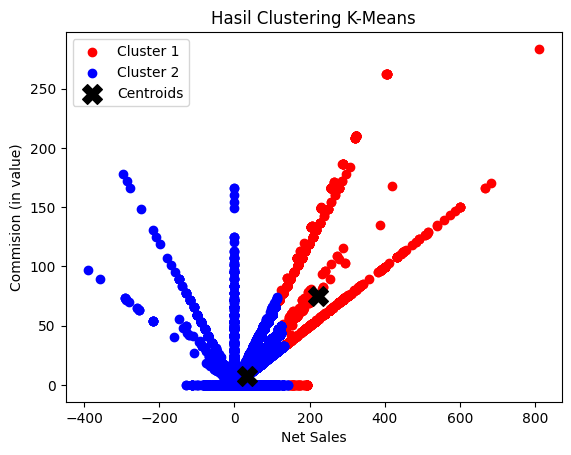

In [75]:
figsize=(10,6)
X = dhya[['Net Sales', 'Commision (in value)']]

# Plot data untuk setiap cluster
plt.scatter(X[dhya['cluster'] == 0]['Net Sales'],
            X[dhya['cluster'] == 0]['Commision (in value)'],
            c='red', label='Cluster 1')
plt.scatter(X[dhya['cluster'] == 1]['Net Sales'],
            X[dhya['cluster'] == 1]['Commision (in value)'],
            c='blue', label='Cluster 2')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X',
            s=200, c='black', label='Centroids')

plt.xlabel('Net Sales')
plt.ylabel('Commision (in value)')
plt.title('Hasil Clustering K-Means')
plt.legend()
plt.show()